In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('loan_approved.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# target loan_status 
# we need to clean the data


## The process of cleaning data

In [7]:
# Loan_id
# constant column
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# catogorical column
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [14]:
# no constant column in data

In [16]:
# check duplicates
data.duplicated().sum()

0

In [17]:
# no duplicate data

In [18]:
# check for null values
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [19]:
# gender to self_ employed--> catogorical replace with mode
#loan_amt to crdit history --> numerical -->1) continous --> normal=mean, skewed and not normal--> median
                                            #2) descrete --> mode

In [20]:
data['Gender'].mode()[0]

'Male'

In [21]:
data.loc[data['Gender'].isnull() ==True,'Gender'] = data['Gender'].mode()[0] # till gender it is condition then converting

In [23]:
data['Gender'].isnull().sum()

0

In [24]:
# now there is no null values for gender


In [25]:
data.loc[data['Married'].isnull() ==True,'Married'] = data['Married'].mode()[0] # till gender it is condition then converting
data.loc[data['Dependents'].isnull() ==True,'Dependents'] = data['Dependents'].mode()[0] # till gender it is condition then converting
data.loc[data['Self_Employed'].isnull() ==True,'Self_Employed'] = data['Self_Employed'].mode()[0] # till gender it is condition then converting

In [26]:
data['Married'].isnull().sum()

0

In [27]:
# no null values left for catogorical

In [28]:
### credit history is a descrete column
# due to which we fill the null values with mode
data.loc[data['Credit_History'].isnull() ==True,'Credit_History'] = data['Credit_History'].mode()[0]

In [30]:
data['Loan_Amount_Term'].unique() # is a descrete data, fill the null with mode



array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [31]:
data.loc[data['Loan_Amount_Term'].isnull() ==True,'Loan_Amount_Term'] = data['Loan_Amount_Term'].mode()[0]

<Axes: ylabel='Density'>

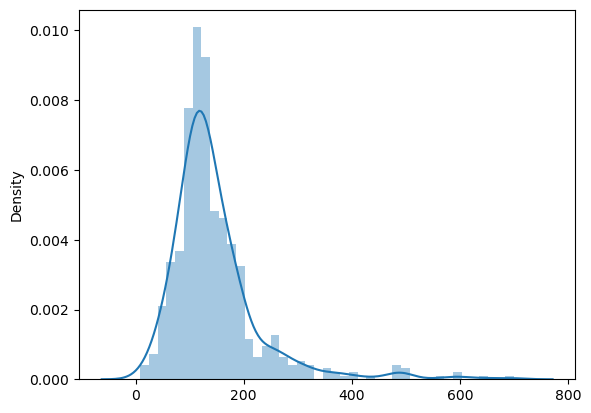

In [32]:
# loan amount is continous data it is giving skewed distribution therefore median
sns.distplot(x=data['LoanAmount'])


In [33]:
data.loc[data['LoanAmount'].isnull() ==True,'LoanAmount'] = data['LoanAmount'].median()

In [36]:
data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [37]:
# now no null values left

In [40]:
# 3) let's check for outliers
df = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [41]:
# we will use conversion 


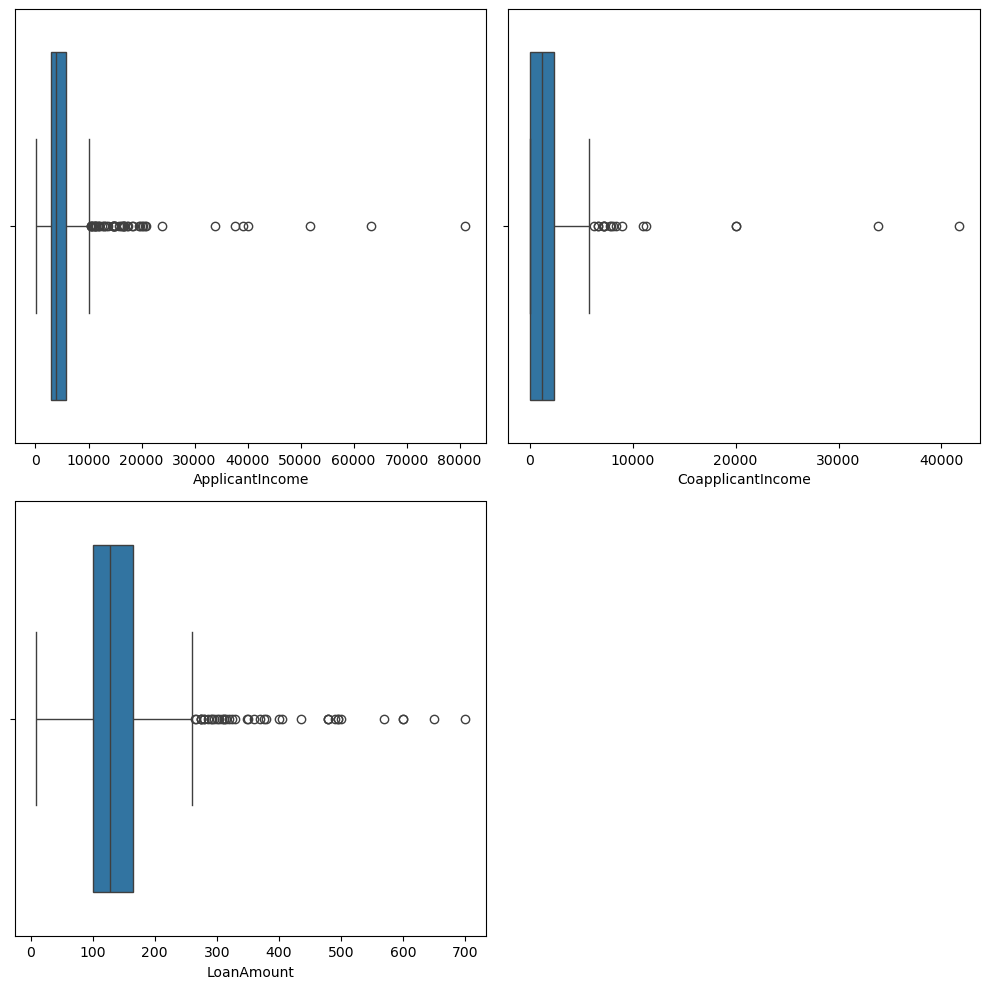

In [44]:
#SUBPLOT
plt.figure(figsize=(10,10))
plotnumber = 1
for i in df:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

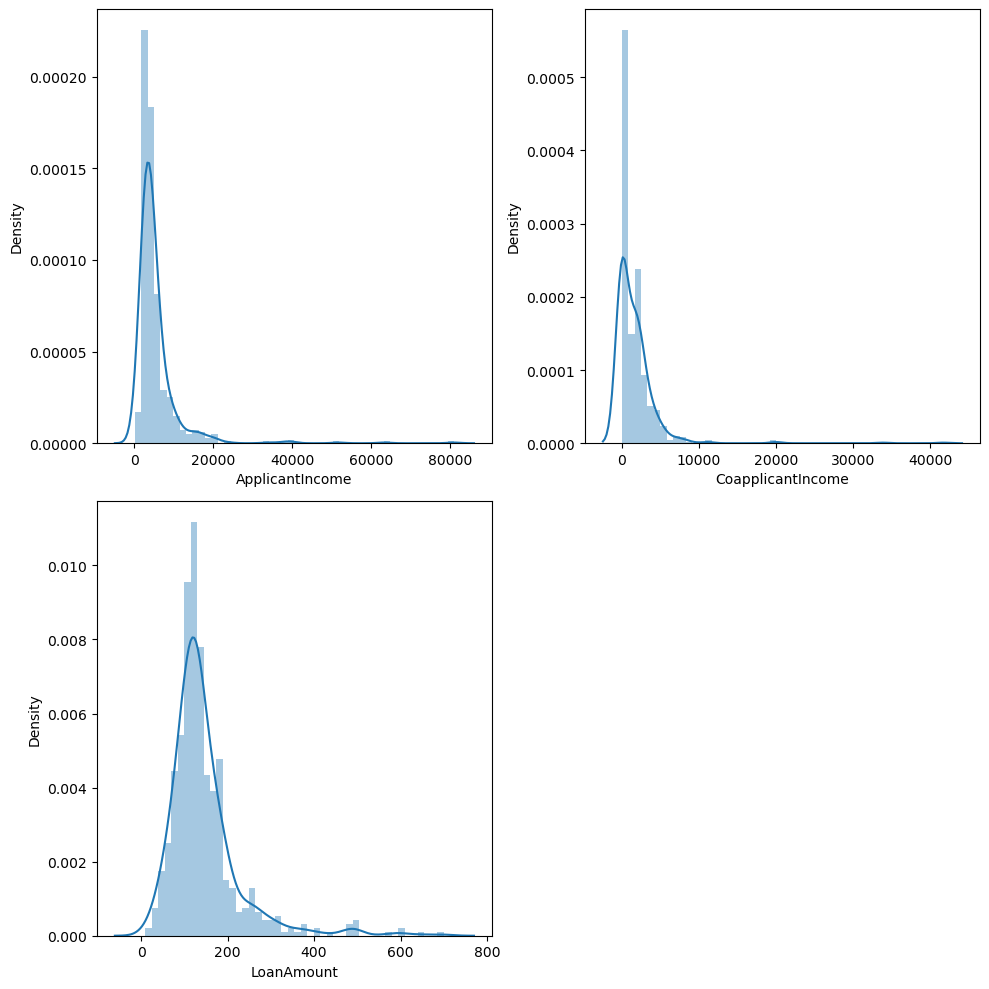

In [48]:
#SUBPLOT
plt.figure(figsize=(10,10))
plotnumber = 1
for i in df:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [50]:
# we will use transformation to covert normal to skewed


<Axes: ylabel='Density'>

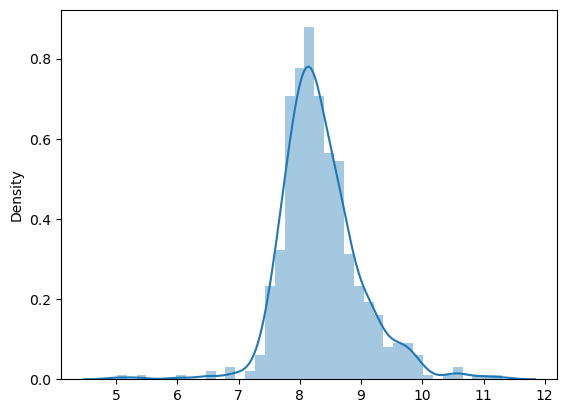

In [52]:
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome']) #1) application income using log transformation as it is highly right skewed
sns.distplot(x=data['ApplicantIncome_log'])

In [53]:
# converted

<Axes: ylabel='Density'>

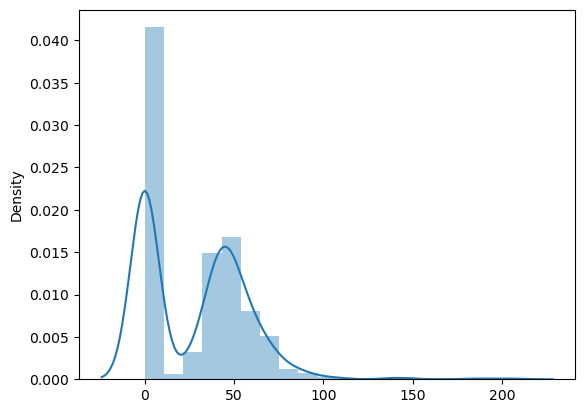

In [55]:
data['CoapplicantIncome_sqrt']= np.sqrt(data['CoapplicantIncome']) # using sqrt as transformation
sns.distplot(x=data['CoapplicantIncome_sqrt'])

In [56]:
# converted

In [57]:
from scipy.stats import boxcox
transformed_data, lambda_value = boxcox(data['LoanAmount']) # using boxcox as transformation
transformed_data

array([5.69785629, 5.69785629, 4.81094386, 5.60976297, 5.83057877,
       6.72774791, 5.29393629, 5.98783695, 6.07309606, 7.11522713,
       4.88820477, 5.47920796, 6.31717416, 5.54001031, 3.1088479 ,
       5.66544122, 5.3628728 , 4.99668095, 5.75033441, 5.55187075,
       5.41573837, 6.96614219, 5.5636351 , 5.51599458, 5.92509754,
       6.25244986, 5.63229007, 5.49157428, 3.99643363, 5.60976297,
       6.32419674, 4.96144108, 5.44146175, 5.54001031, 6.98898404,
       5.69785629, 5.3628728 , 5.85957609, 6.2001051 , 5.49157428,
       5.06463157, 4.37083823, 4.97917091, 5.76060814, 5.30799084,
       5.19149243, 4.28644973, 5.85957609, 5.60976297, 5.85957609,
       5.3628728 , 5.60976297, 5.51599458, 5.76060814, 6.82656541,
       5.3219091 , 5.30799084, 5.77081041, 6.16935117, 5.85957609,
       5.60976297, 5.34934749, 6.04802814, 5.69785629, 5.5636351 ,
       6.67862143, 5.67632635, 6.95227373, 5.66544122, 5.78094222,
       6.10587637, 5.3219091 , 5.08112214, 5.29393629, 6.22276

In [58]:
lambda_value

0.06455377022904334

In [59]:
# 5)encoding

In [60]:
# ordinal and nominal --> gender -> nominal

In [61]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Married'] = lc.fit_transform(data['Married'])
# we applied labelled encoder for married --> ordinal data

In [62]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),ApplicantIncome_log,CoapplicantIncome_sqrt
0,LP001002,Male,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026,0.000000
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109,38.832976
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368,0.000000
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707,48.559242
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515,0.000000


In [63]:
pd.get_dummies(data['Gender'],dtype='int',drop_first=True) # it has nominal data we went for onehot encoding , has values less than 2
# 1st column dropped

,Male
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [64]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),ApplicantIncome_log,CoapplicantIncome_sqrt
0,LP001002,Male,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026,0.000000
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109,38.832976
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368,0.000000
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707,48.559242
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515,0.000000


<Axes: xlabel='Property_Area', ylabel='count'>

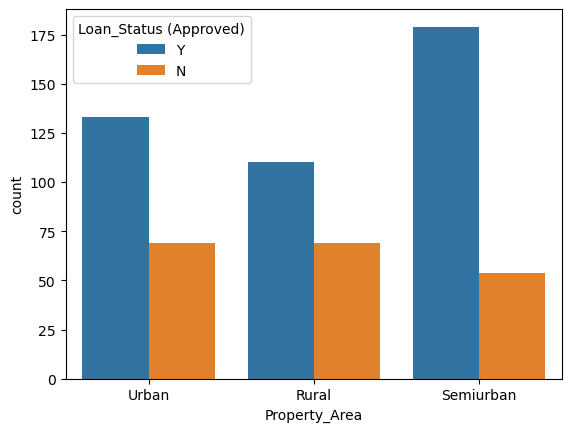

In [65]:
sns.countplot(x=data['Property_Area'],hue = data['Loan_Status (Approved)'])

In [66]:

data.loc[data['Property_Area']=='Rural','Property_Area']  = 0
data.loc[data['Property_Area']=='Urban','Property_Area']  = 1
data.loc[data['Property_Area']=='Semiurban','Property_Area']  = 2

In [67]:
data['Property_Area'] = data['Property_Area'].astype('int64')

In [68]:
data.dtypes

Loan_ID                    object
Gender                     object
Married                     int32
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int64
Loan_Status (Approved)     object
ApplicantIncome_log       float64
CoapplicantIncome_sqrt    float64
dtype: object

In [69]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),ApplicantIncome_log,CoapplicantIncome_sqrt
0,LP001002,Male,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,1,Y,8.674026,0.000000
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N,8.430109,38.832976
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,Y,8.006368,0.000000
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,Y,7.856707,48.559242
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,1,Y,8.699515,0.000000


In [70]:
df = data[['Self_Employed','Loan_Status (Approved)']]
for i in df:
    data[i] = lc.fit_transform(data[i])

In [71]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),ApplicantIncome_log,CoapplicantIncome_sqrt
0,LP001002,Male,0,0,Graduate,0,5849,0.0,128.0,360.0,1.0,1,1,8.674026,0.000000
1,LP001003,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430109,38.832976
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,1,1,8.006368,0.000000
3,LP001006,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,1,1,7.856707,48.559242
4,LP001008,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,1,1,8.699515,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,0,1,7.972466,0.000000
610,LP002979,Male,1,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,0,1,8.320205,0.000000
611,LP002983,Male,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,1,1,8.996157,15.491933
612,LP002984,Male,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,1,1,8.933664,0.000000


In [72]:
from sklearn.preprocessing import OrdinalEncoder
Education_enc =  OrdinalEncoder(categories=[['Not Graduate', 'Graduate']])
Education_enc

OrdinalEncoder(categories=[['Not Graduate', 'Graduate']])